In [1]:
import sys
sys.path.insert(0, '../src/autoscore/')
import cv2 as cv
import torch
from matplotlib import pyplot as plt

from os import listdir
from os.path import isfile, join

In [2]:
'''
Parsing all the staff description xml files for both datasets that were 
generated by deepscores.cc and muscima.cc binaries
'''
from datasets import staff_xml

artificial_fn = '../datasets/Artificial/'
artificial_files = [f for f in listdir(artificial_fn) if isfile(join(artificial_fn, f))]
handwritten_fn = '../datasets/Handwritten/'
handwritten_files = [f for f in listdir(handwritten_fn) if isfile(join(handwritten_fn, f))]

artificial_files = [staff_xml(join(artificial_fn, f)) for f in artificial_files]
handwritten_files = [staff_xml(join(handwritten_fn, f)) for f in handwritten_files]

In [3]:
# Parsing deepscores dataset groundtruths
from datasets import deepscores_gt, muscima_gt

deepscores_fn = '../../data/DEEPSCORES/images_png/'
deepscores_gt_fn = '../../data/DEEPSCORES/xml_annotations/'
muscima_fn = '../../data/MUSCIMA/CvcMuscima-Distortions/'
muscima_gt_fn = '../../data/MUSCIMA/v1.0/data/cropobjects_manual/'

glyphs = []
deepscores_dict = dict()
for music_file in artificial_files: 
    music_file.compute_kernel()
    glyph_list = deepscores_gt(music_file.filename, deepscores_gt_fn, deepscores_dict)
    glyphs.append(glyph_list)
    
for idx, music_file in enumerate(artificial_files):
    music_file.locate(glyphs[idx], deepscores_dict)

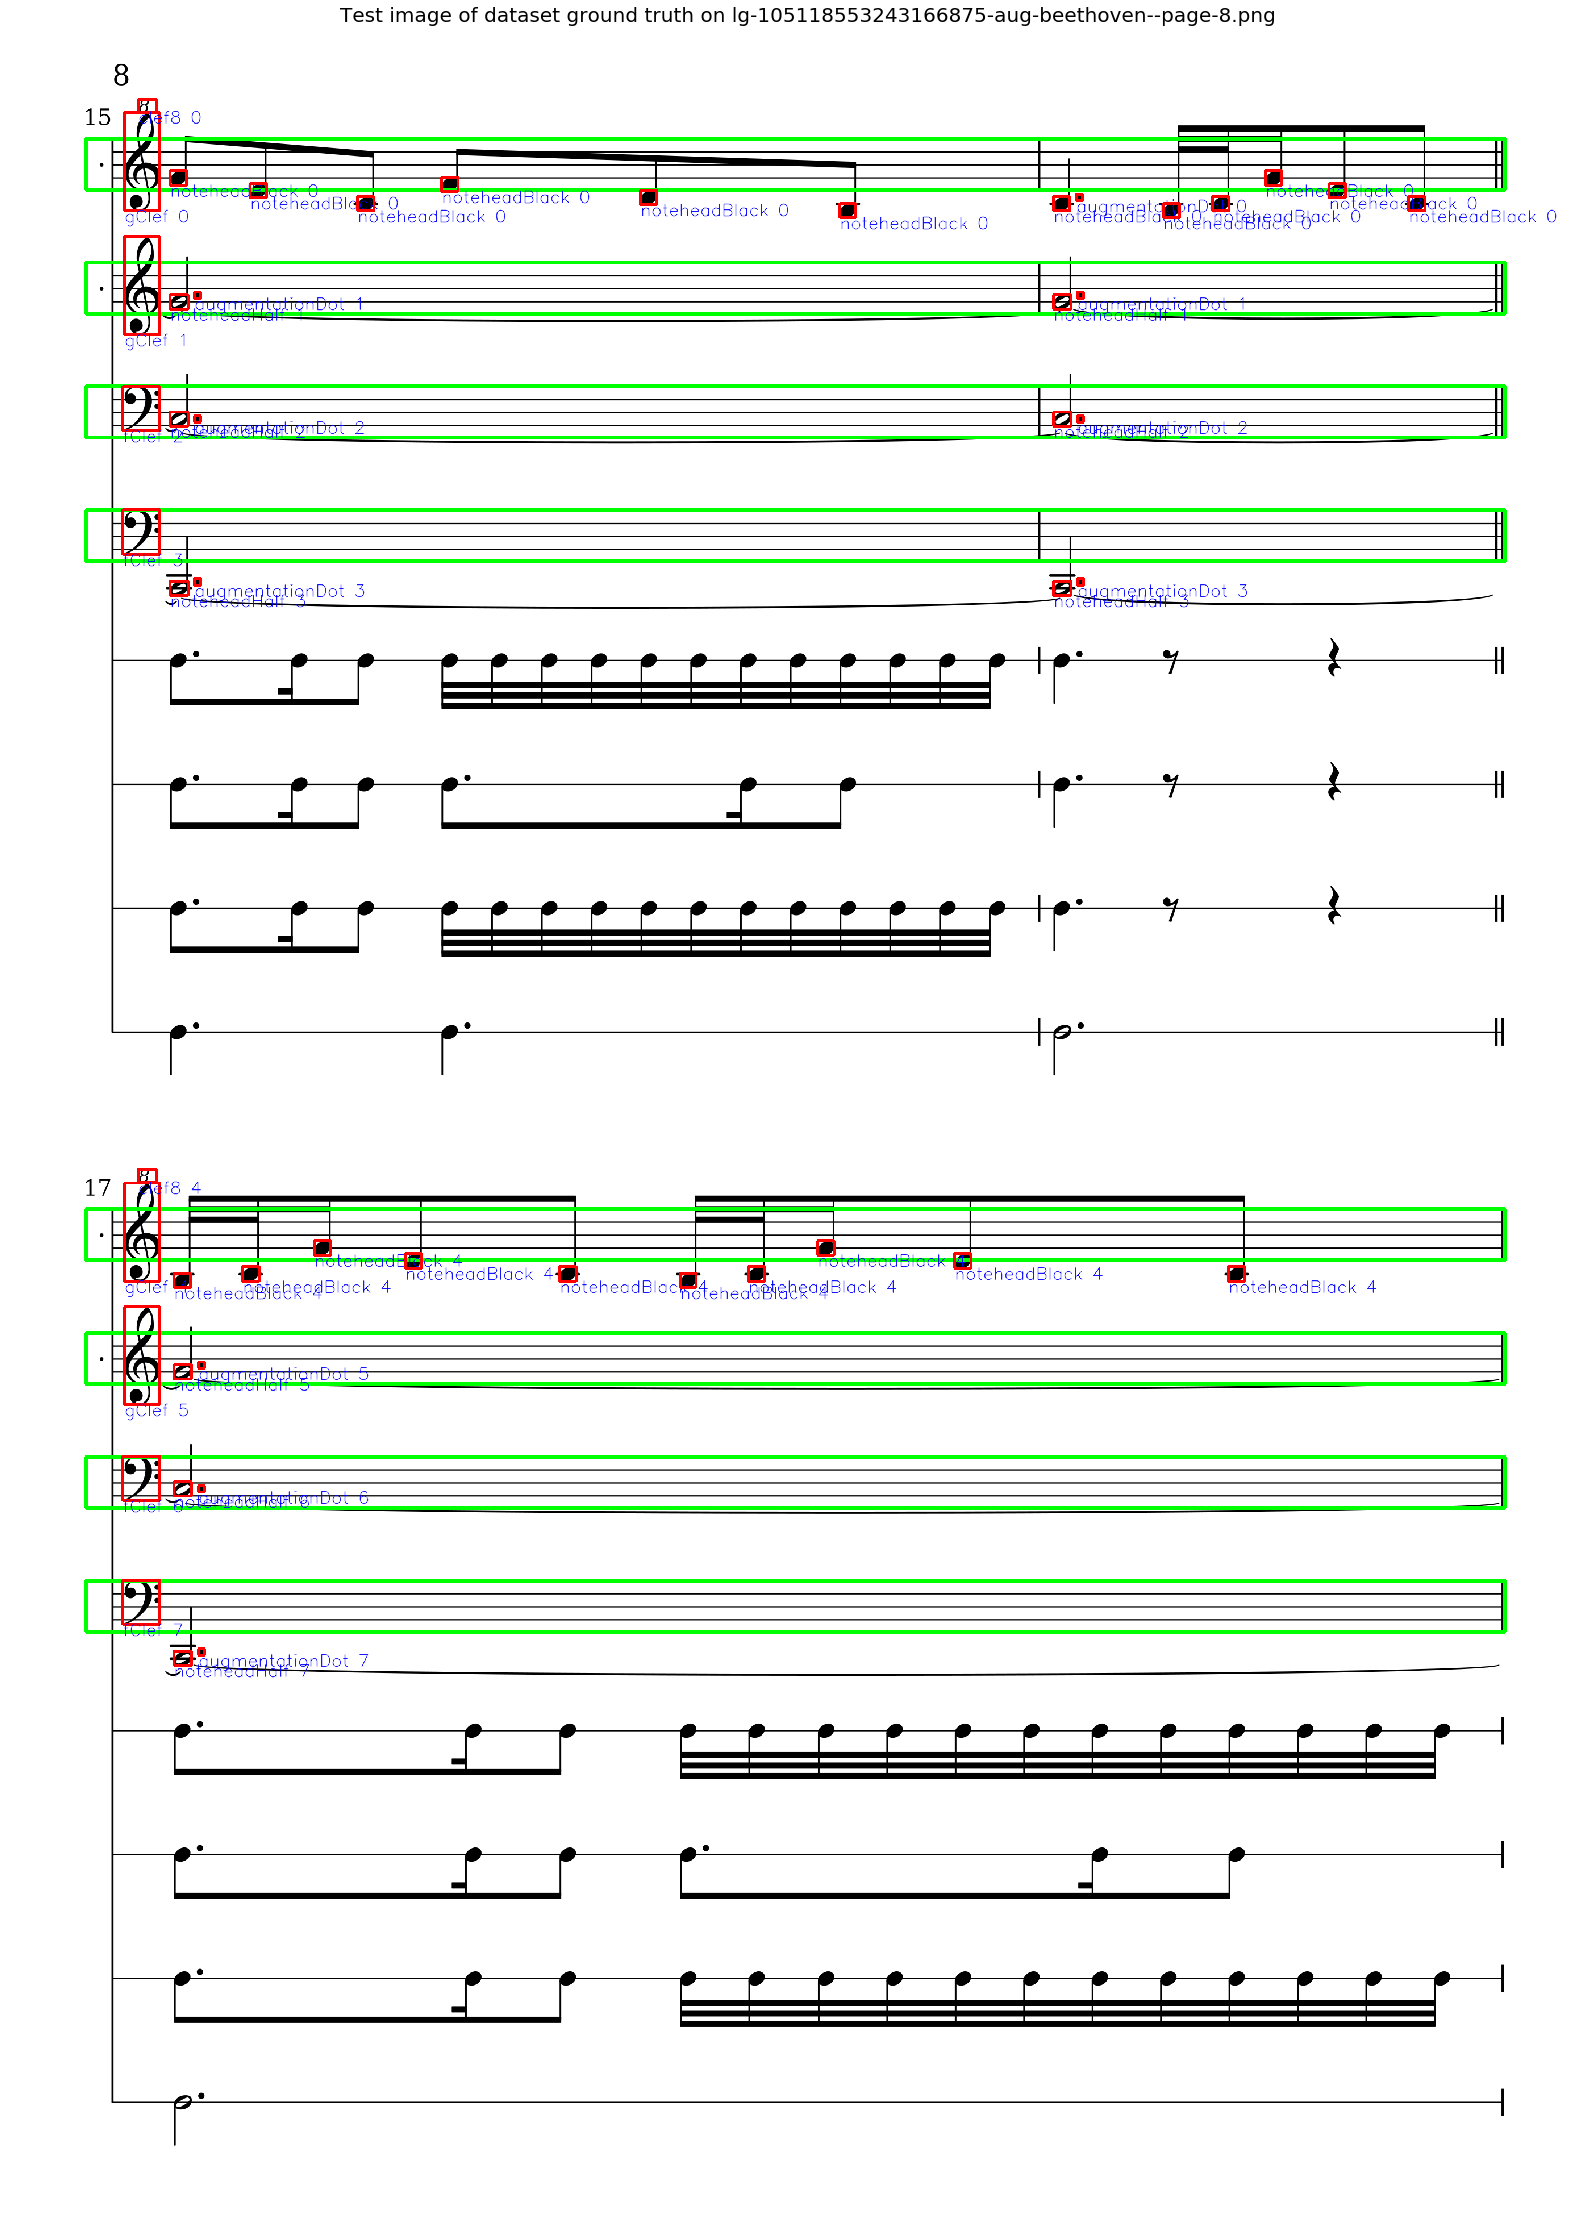

In [4]:
# Visualizing the result
%matplotlib inline

test_filename = artificial_files[0].filename
img = cv.imread(join(deepscores_fn, test_filename), cv.CV_8UC1)
img = artificial_files[0].visualize(img, divs=False)
    
plt.figure(figsize=(40,40))
plt.imshow(img / 255.0);
plt.axis('off')
plt.title('Test image of dataset ground truth on {0}'.format(test_filename),
         fontsize=20);

In [5]:
from datasets import sort_by_writers

sorted_handwritten_files = sort_by_writers(handwritten_files)
muscima_dict = dict()
glyphs = []
for music_file in sorted_handwritten_files: 
    filename = 'CVC-MUSCIMA_W-' + str(music_file[0]).zfill(2) + '_N-' + str(music_file[1]).zfill(2) + '_D-ideal.xml'
    glyphs.append(muscima_gt(filename, muscima_gt_fn, muscima_dict))
    
for idx, music_file in enumerate(sorted_handwritten_files):
    # Processing each distortion individually
    for file in sorted_handwritten_files[music_file]:
        file.compute_kernel()
        file.locate(glyphs[idx], muscima_dict)

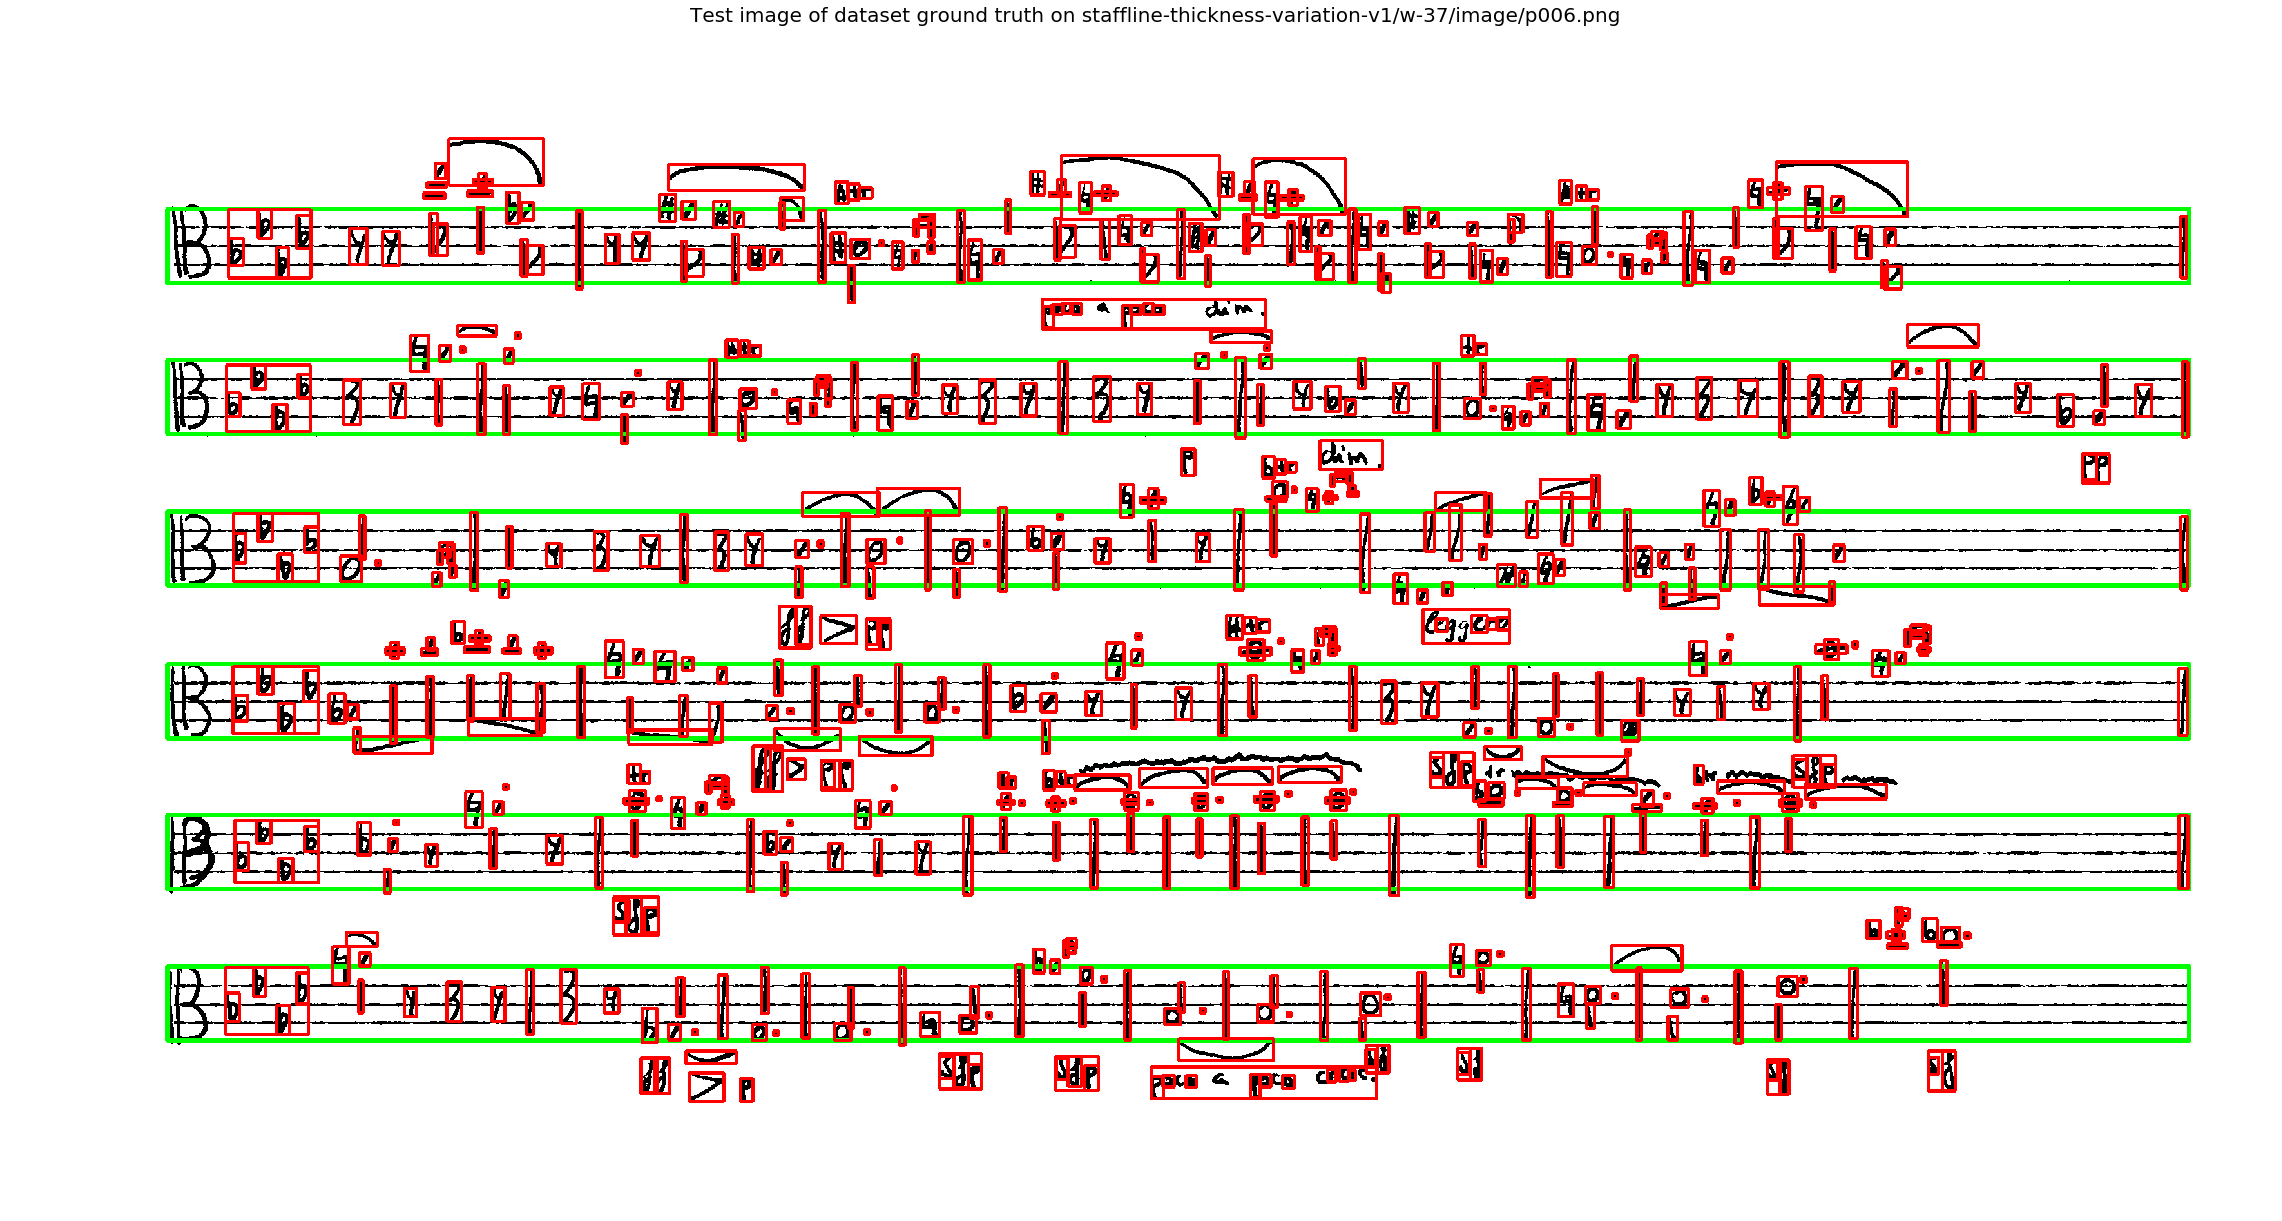

In [6]:
plt.figure(figsize=(40,40))

file = sorted_handwritten_files[list(sorted_handwritten_files.keys())[0]][0]
img = cv.imread(join(muscima_fn, file.filename), cv.CV_8UC1)
_, img = cv.threshold(img, 128, 255, cv.THRESH_BINARY_INV)
img = file.visualize(img, divs=False, labels=False)
plt.axis('off')
plt.imshow(img / 255.0);
plt.title('Test image of dataset ground truth on {0}'.format(file.filename),
         fontsize=20);

In [7]:
# Printing all the labels and their count across all the datasets
for key in deepscores_dict:
    print('{0} : {1}'.format(key, deepscores_dict[key]))
print('----------------------------------------------------')
for key in muscima_dict:
    print('{0} : {1}'.format(key, muscima_dict[key]))

noteheadBlack : 122376
noteheadHalf : 10171
augmentationDot : 7370
restQuarter : 4975
rest8th : 5432
gClef : 5901
clef8 : 720
fClef : 3020
flag8thUp : 3146
accidentalSharp : 3507
flag16thUp : 735
accidentalNatural : 2474
flag32ndUp : 113
rest32nd : 646
rest16th : 2796
dynamicMF : 330
accidentalFlat : 1761
tuplet3 : 971
keyFlat : 7625
brace : 1502
restWhole : 7902
restHalf : 1698
flag16thDown : 831
timeSig3 : 209
timeSig8 : 108
keySharp : 6016
timeSigCommon : 485
repeatDot : 952
timeSig4 : 1408
arpeggiato : 62
flag8thDown : 3457
timeSig5 : 40
noteheadWhole : 3149
fClefChange : 57
fermataAbove : 161
timeSig2 : 151
caesura : 61
dynamicPiano : 210
dynamicFFF : 80
cClefAlto : 204
dynamicFF : 165
dynamicForte : 323
unpitchedPercussionClef1 : 295
articAccentBelow : 536
articStaccatoBelow : 1860
stringsUpBow : 15
articStaccatoAbove : 2163
articTenutoAbove : 160
stringsDownBow : 11
dynamicMP : 273
rest128th : 39
rest64th : 816
restHBar : 216
clef15 : 26
flag64thUp : 52
accidentalDoubleSharp : 1

42


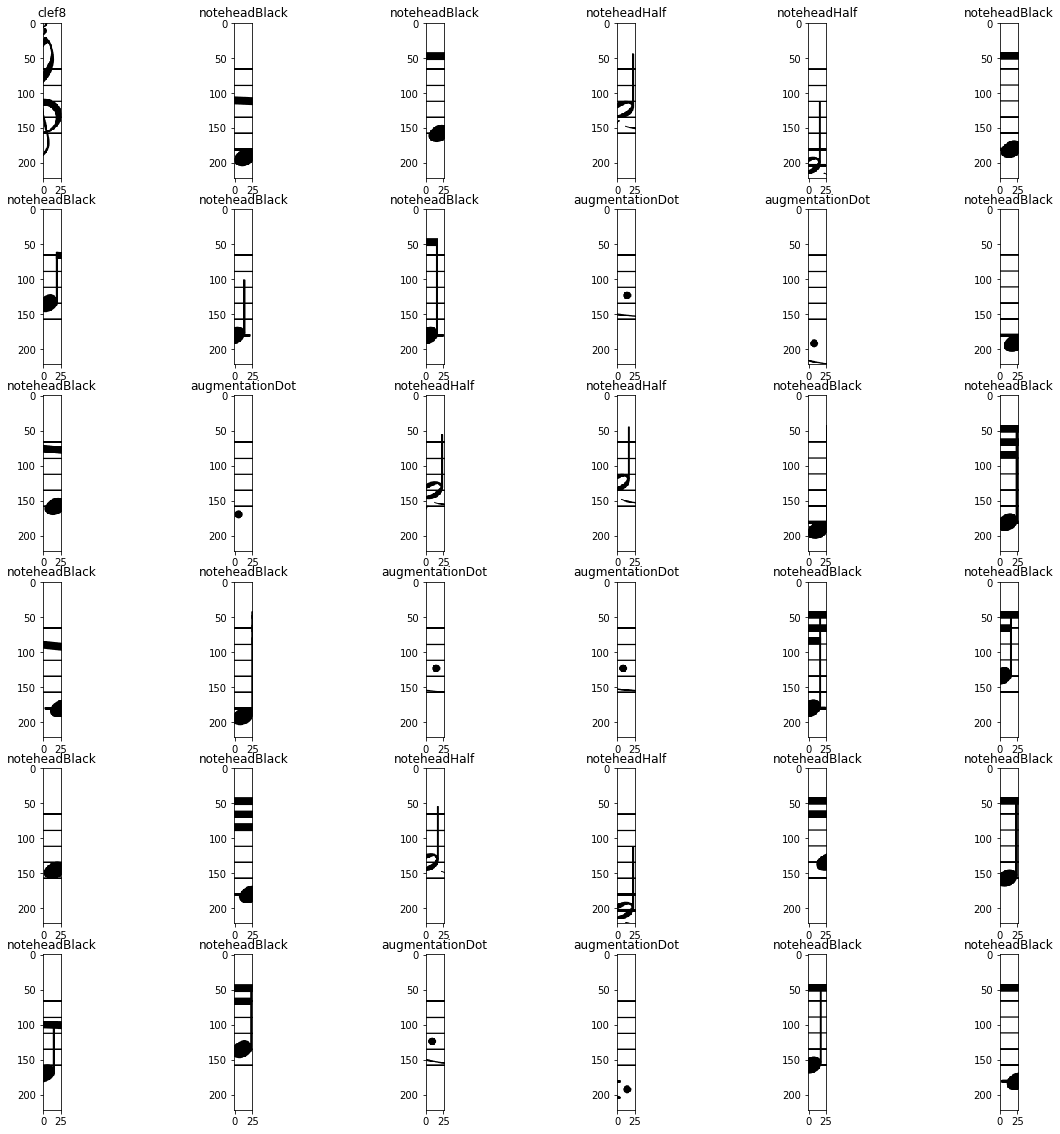

In [8]:
# Displaying the samples for training in a single image (computer generated)
file = artificial_files[0]
img = cv.imread(join(deepscores_fn, file.filename), cv.CV_8UC1)
samples = file.extract_samples(img, deepscores_dict, thresh=0.5)
print(len([sample for sample in samples if sample[1] != 'None']))
fig, axes = plt.subplots(6,6, figsize=(20,20))

i = 0
for sample in samples:
    if sample[1] == 'None':
        continue
    idx = i % len(axes), i // len(axes)
    axes[idx].imshow(sample[0] / 255.0, cmap='gray')
    axes[idx].set_title(sample[1])
    i += 1
    if i == len(axes)**2: 
        break

337


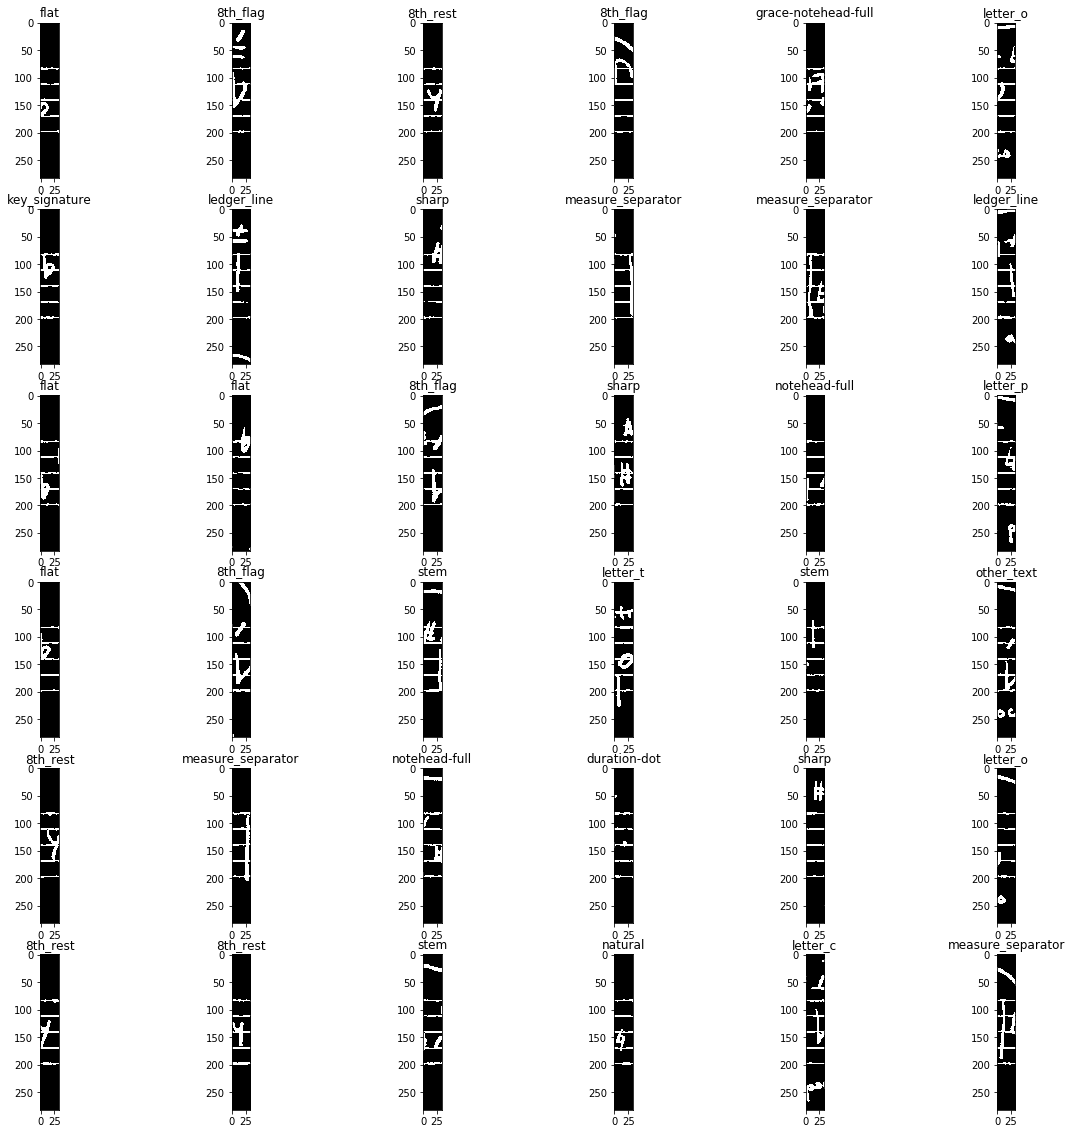

In [9]:
# Displaying the samples for training in a single image (handwritten)
file = handwritten_files[0]
img = cv.imread(join(muscima_fn, file.filename), cv.CV_8UC1)
samples = file.extract_samples(img, muscima_dict, thresh=0.5)
print(len([sample for sample in samples if sample[1] != 'None']))
fig, axes = plt.subplots(6,6, figsize=(20,20))

i = 0
for sample in samples:
    if sample[1] == 'None':
        continue
    idx = i % len(axes), i // len(axes)
    axes[idx].imshow(sample[0] / 255.0, cmap='gray')
    axes[idx].set_title(sample[1])
    i += 1
    if i == len(axes)**2: 
        break